# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [5]:
print(f'Набір даних містить {df.shape[0]} рядків та {df.shape[1]} колонок')

Набір даних містить 10886 рядків та 19 колонок


In [6]:
detal = df.index[1] - df.index[0]
print(f'Рівень деталізації: {detal} годин')

Рівень деталізації: 0 days 01:00:00 годин


Висновок: Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [7]:
rent_day = df['count'].resample('D').sum()
rent_day

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

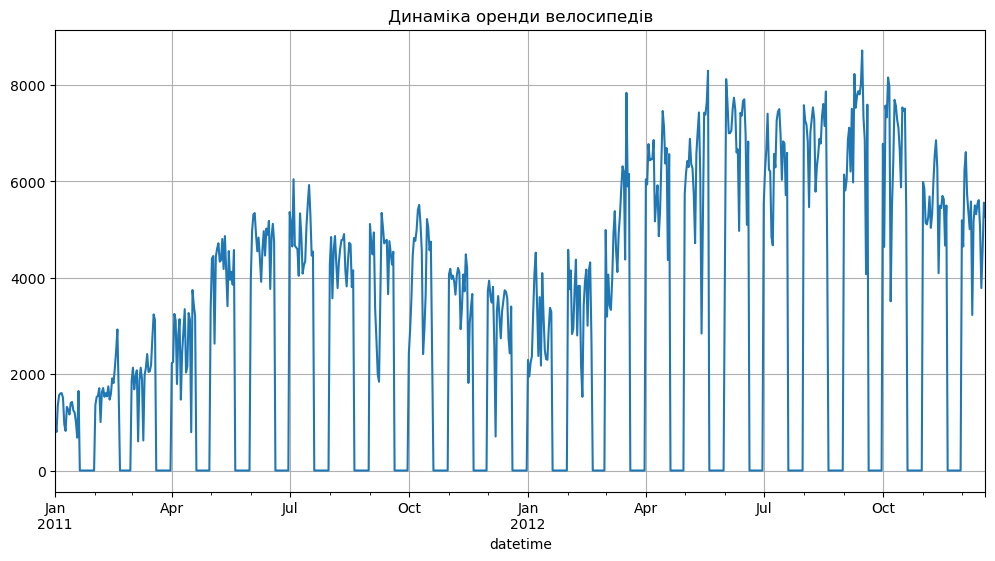

In [8]:
rent_day.plot(
    figsize=(12, 6), title='Динаміка оренди велосипедів',
    grid=True
    );
plt.show()

In [9]:
print(rent_day[rent_day == 0])

datetime
2011-01-20    0
2011-01-21    0
2011-01-22    0
2011-01-23    0
2011-01-24    0
             ..
2012-11-26    0
2012-11-27    0
2012-11-28    0
2012-11-29    0
2012-11-30    0
Name: count, Length: 263, dtype: int64


Висновок:
1.Заломи на графіку викликані відсутністю записів у деякі дні, тому вони виглядають як падіння до нуля. Це не справжня відсутність оренд, а відсутність самих записів, імовірно — через особливості збору даних або можливо режиму роботи,  (наприклад прокат відбувається на території парку який працює перші 19  днів місяця). Для того щоб не було провалів можна використати середнє значення, також можна побудувати графік використавши дані лише 1-19 числа кожного місяця.
2 Спостерігається що березня-квітня 2012 року к-ть оренд значно зросла. Це може відбуватися за рахунок покращення сервісу, залучення більшої к-ті користувачів( наприклад за рахунок рекламної акції) або ж збільшення к-ті велосипедів.
3. Добре простежується сезонні коливання: 
- найнижча оренда — у січні–лютому;
- зростання — з березня;
- пік припадає на червень -  жовтень.
6.Аномально високий даних не спостерігається, можна побачити аномально низькі значення у вигляді 0 ( цей момент ми розглдали у п.1)


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [24]:
avg_rent_season = df.groupby('season')['count'].mean()
avg_rent_season

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

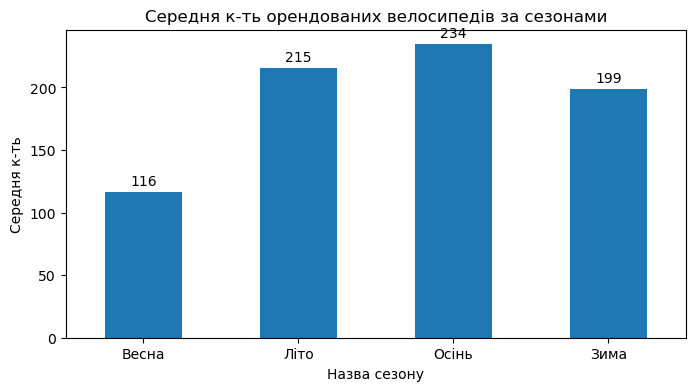

In [34]:
ax = avg_rent_season.plot.bar(
    figsize=(8, 4),
    title='Середня к-ть орендованих велосипедів за сезонами',
    ylabel='Середня к-ть',
    xlabel='Назва сезону',
)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,
        f'{height:.0f}', 
        ha='center', va='bottom'
    ) 

labels = ['Весна', 'Літо', 'Осінь', 'Зима']
ax.set_xticklabels(labels)
plt.xticks(rotation=0)
plt.show()

Я сезонність використовую ту що вказана в дата сеті
1. Осінню найбільша середня кількість оренди велосипедів і складає в середньому 234.
2. Така сезонна закономірність може бути пов'язана із погодними умовами.
3. У 2 рази різниця між найпопулярнішим та найменш популярним сезоном

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [38]:
monthly_rent = df.groupby('month')['count'].mean()
monthly_rent


month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

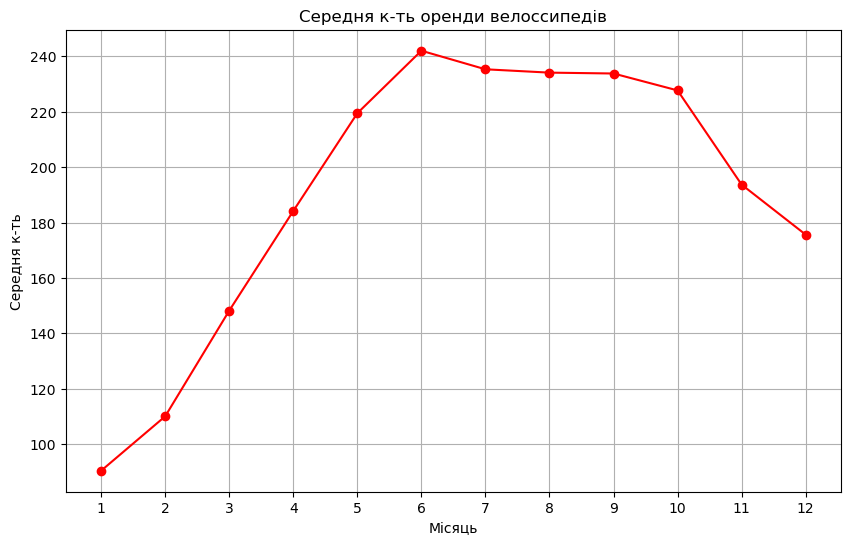

In [43]:
ax = monthly_rent.plot(
    kind='line',
    marker='o',
    figsize=(10, 6),
    title='Середня к-ть оренди велоссипедів',
    xlabel='Місяць',
    ylabel='Середня к-ть',
    color='red',
    grid=True
)

ax.set_xticks(range(1, 13));
plt.show()

1. Ми бачимо що пік оренди припадає на червень місяць і складає в середньому 242 оренди, а спад у січні і складає 90 оренд.
2. Так співпадає( якщо брати що по даних дата сету січень у нас вважається весною, а червень осінню)
3. При низькій температурі, при сильному вітрі, при ожеледиці або коли йде дощ не комфортно їздити на велосипеді. 

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [45]:
weather_counts = df['weather'].value_counts()
weather_counts 

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

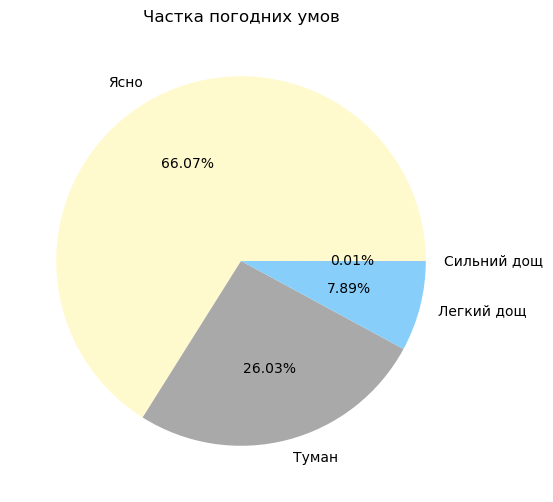

In [46]:
weather_counts .plot.pie(
     figsize=(10, 6),
     autopct='%1.2f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
     title='Частка погодних умов',
     ylabel='',
   colors = ['#FFFACD', '#A9A9A9', '#87CEFA', '#9370DB']
);
plt.show()

1. У даних переважають дані із  ясною погодою і складає 66.07%.
2. Так, дані є із сильним дощем і складає 0,01%
3. Так вплтває, бо їзда на велосипеді при несприятливих погодних умов є некомфортною. І коли сильний дощ людина надасть перевагу замовленню таксі для пересування.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

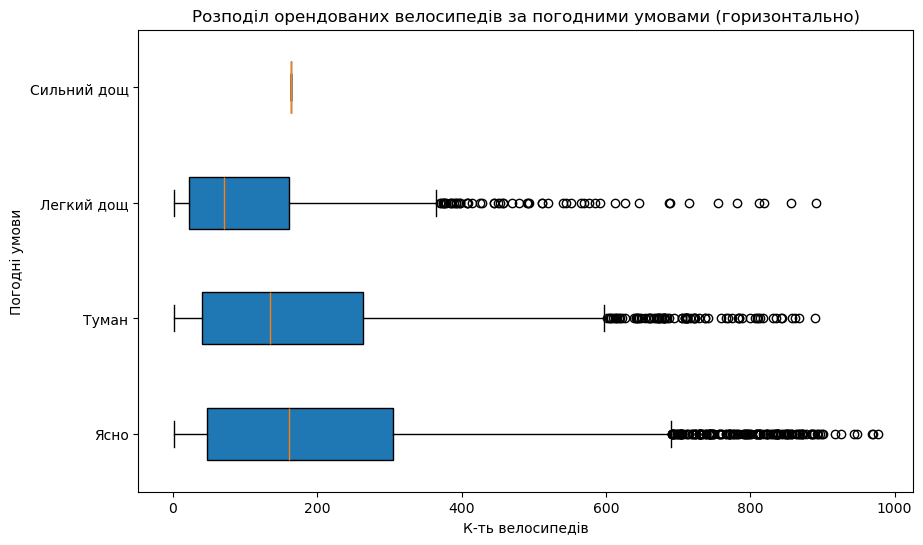

In [50]:
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']


data = [
    df[df['weather'] == 1]['count'],
    df[df['weather'] == 2]['count'],
    df[df['weather'] == 3]['count'],
    df[df['weather'] == 4]['count']
]

plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False, patch_artist=True, tick_labels=labels)

plt.title('Розподіл орендованих велосипедів за погодними умовами (горизонтально)')
plt.xlabel('К-ть велосипедів')
plt.ylabel('Погодні умови')
plt.show()

1.Найбільший розкид спостерігається при ясній погоді
2. Так, викиди є при всіх видах погоди окрім погоди сильний дощ.
3. При ясній погоді медіанне значення оренди найвищий.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

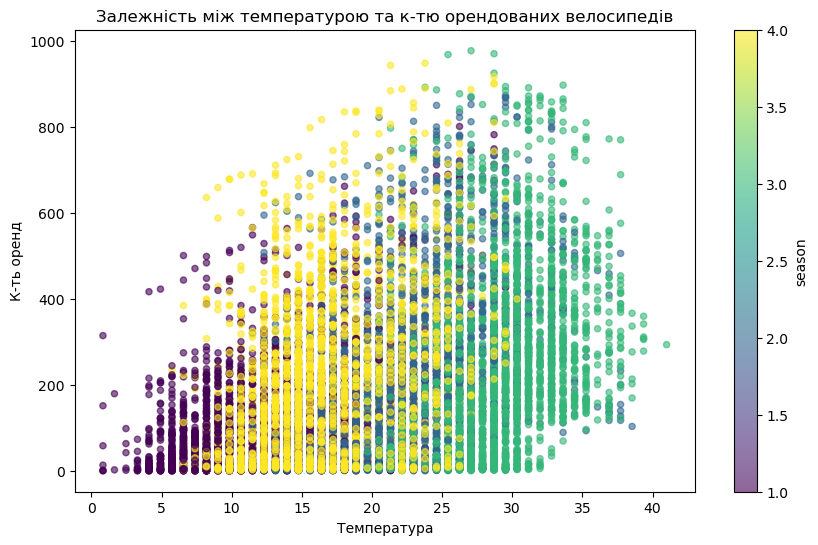

In [54]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    title='Залежність між температурою та к-тю орендованих велосипедів',
    figsize=(10, 6),
    alpha=0.6
)
plt.xlabel('Температура')
plt.ylabel('К-ть оренд')
plt.show()


Так, звязок існує. Він нелінійний, але явно позитивний, тобто при збільшені температури збільшується к-ть оренд, але коли температу стає вище 30, то бачимо зменшення к-ті оренд велосипедів.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [57]:
days_rent = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg_rent = df.groupby('weekday')[['casual', 'registered']].mean()
weekday_avg_rent = weekday_avg_rent.loc[days_rent]

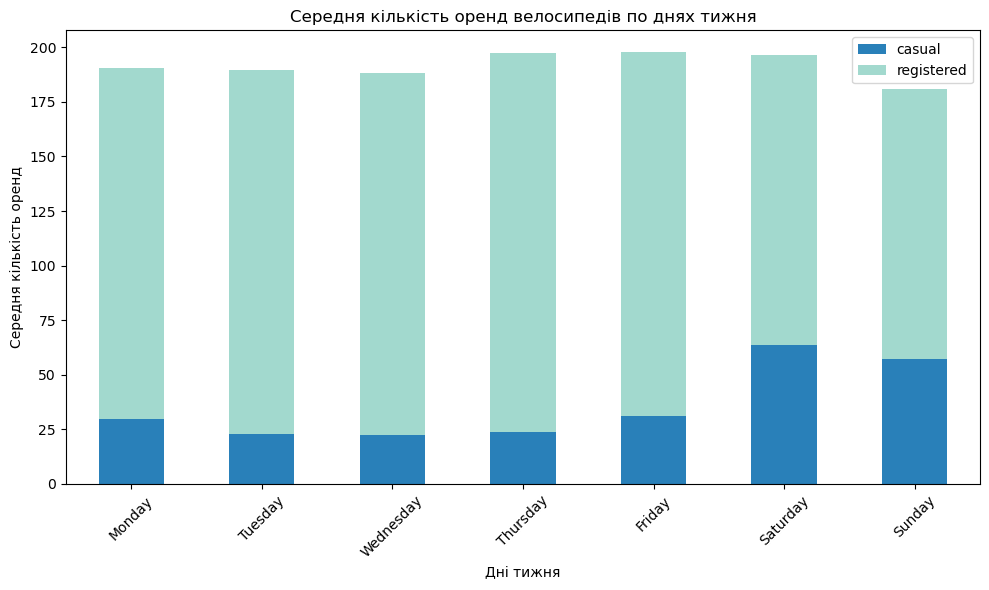

In [59]:
ax = weekday_avg_rent.plot.bar(
    stacked=True,
    figsize=(10, 6),
    color=['#2980B9', '#A2D9CE'],
    title='Середня кількість оренд велосипедів по днях тижня'
)

ax.set_ylabel('Середня кількість оренд')
ax.set_xlabel('Дні тижня')
plt.xticks(rotation=45)
plt.legend(['casual', 'registered'])
plt.tight_layout()
plt.show()

Зареєстровані користувачі користуються послугами оренди преважно в будні, що може бути пов'язано з потребою добиратися на роботу/навчання. У вихідні спостерігається підвищення попитом оренди серед незареєстрованих користувачів, що може свідчити про використання велосипедів з прогулянковою метою(тобто більш імпульсивне бажання скористатися послугами оренди)